In [306]:
pip install pycryptodome



Source node: 51
Target node: 25

Shortest path between nodes 51 and 25: [51, 50, 49, 48, 47, 44, 43, 42, 71, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25]
[[0 1 0 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]


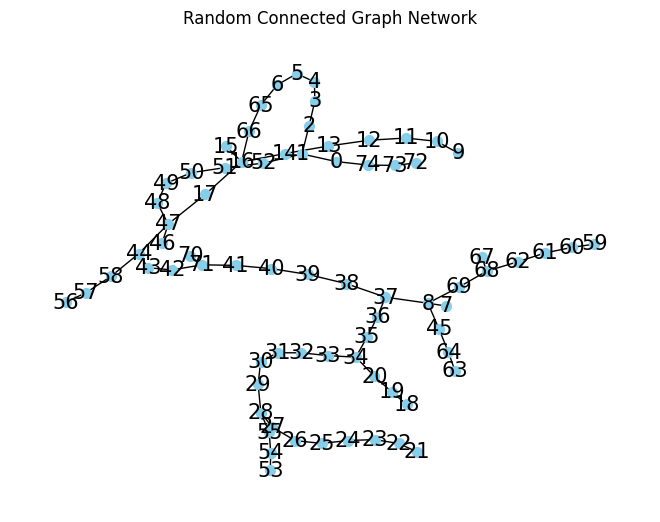

In [307]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pprint

pp = pprint.PrettyPrinter(indent=4)

def list_to_map(input_list):
    return {index: value for index, value in enumerate(input_list)}

def generate_payer_payee(n):
    if n <= 1:
        raise ValueError("n must be greater than 1")

    num1 = random.randint(0, n - 1)
    num2 = random.randint(0, n - 1)

    while num1 == num2 or abs(num1 - num2) < 4:
        num2 = random.randint(0, n - 1)

    return num1, num2

def create_and_display_random_connected_graph(n):
    # Create a connected random graph with n nodes
    G = nx.connected_watts_strogatz_graph(n, k=3, p=0.2)
    # Display the graph
    #Simulate payments

    # generate random source and target nodes
    source , target = generate_payer_payee(n)
    print("\nSource node:", source)
    print("Target node:", target)

    # Find a path between nodes source and target
    path = nx.shortest_path(G, source=source, target=target)
    print(f"\nShortest path between nodes {source} and {target}: {path}")

    # Payment path stored in map
    payment_path = list_to_map(path)

    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    adjacency_matrix_list = adjacency_matrix.tolist()
    print(adjacency_matrix)
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=15, font_weight="normal")
    plt.title("Random Connected Graph Network")
    plt.show()

    return G, source, target, adjacency_matrix_list, payment_path


# Example usage:
num_of_nodes = 75  # Number of nodes
G, payer, payee, network_graph, payment_path = create_and_display_random_connected_graph(num_of_nodes)
# print(type(G))
# print(type(payer))
# print(type(payee))
# print(type(network_graph))
# print(type(payment_path))

# this n is used later, by initialised to users_in_path
n = 0

# making copy of original network data to re-run simulation on same network
G_org, payer_org, payee_org, network_graph_org, payment_path_org = G.copy(), payer, payee, network_graph.copy(), payment_path.copy()

In [308]:
print(payment_path)

# Finding actual number of users from the complete network which will take part in multi-hop payment
users_in_path = len(payment_path)
print(f"\nNumber of nodes in path : {users_in_path}")

users_in_path_org = users_in_path

{0: 51, 1: 50, 2: 49, 3: 48, 4: 47, 5: 44, 6: 43, 7: 42, 8: 71, 9: 41, 10: 40, 11: 39, 12: 38, 13: 37, 14: 36, 15: 35, 16: 34, 17: 33, 18: 32, 19: 31, 20: 30, 21: 29, 22: 28, 23: 27, 24: 26, 25: 25}

Number of nodes in path : 26


In [309]:
def generate_faulty_nodes_map(n, percentage_of_ones):
    if not 0 <= percentage_of_ones <= 100:
        raise ValueError("Percentage must be between 0 and 100")

    # Calculate the number of ones to be generated
    num_ones = int(n * percentage_of_ones / 100)

    # Create the map with all zeros
    faulty_map = {}

    # Assign ones randomly
    ones_indices = random.sample(range(n), num_ones)
    for index in range(n):
        faulty_map[index] = 1 if index in ones_indices else 0

    return faulty_map


# Percentage of faulty nodes
percentage_of_faulty_nodes = 0
faulty_map = generate_faulty_nodes_map(num_of_nodes, percentage_of_faulty_nodes)
faulty_map[payer] = 0
faulty_map[payee] = 0
print("Generated faulty map:")
print(faulty_map)

# print(type(faulty_map))
faulty_map_org = faulty_map.copy()

Generated faulty map:
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0}


In [310]:
# Re-initialising with the original data for simulating the same environment
G, payer, payee, network_graph, payment_path = G_org.copy(), payer_org, payee_org, network_graph_org.copy(), payment_path_org.copy()
users_in_path = users_in_path_org
faulty_map = faulty_map_org.copy()

print(payment_path)

{0: 51, 1: 50, 2: 49, 3: 48, 4: 47, 5: 44, 6: 43, 7: 42, 8: 71, 9: 41, 10: 40, 11: 39, 12: 38, 13: 37, 14: 36, 15: 35, 16: 34, 17: 33, 18: 32, 19: 31, 20: 30, 21: 29, 22: 28, 23: 27, 24: 26, 25: 25}


In [311]:
import os
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.primitives.asymmetric import rsa, padding as asymmetric_padding
from cryptography.hazmat.primitives.ciphers import Cipher
from cryptography.hazmat.primitives.ciphers.algorithms import AES
from cryptography.hazmat.primitives.ciphers.modes import CBC
from cryptography.hazmat.primitives.hashes import SHA256

def generate_user_keys(user_list):
    user_keys = {}
    for user in user_list:
        # Generate private key for each user
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048
        )
        # Extract public key from private key
        public_key = private_key.public_key()
        # Store public-private key pair in the map
        user_keys[user] = (public_key, private_key)
    return user_keys

def hybrid_encrypt(plaintext, public_key):

    # Pad the plaintext
    pkcs7_padder = padding.PKCS7(AES.block_size).padder()
    padded_plaintext = pkcs7_padder.update(plaintext) + pkcs7_padder.finalize()

    # Generate new random AES-256 key
    key = os.urandom(256 // 8)

    # Generate new random 128 IV required for CBC mode
    iv = os.urandom(128 // 8)

    # AES CBC Cipher
    aes_cbc_cipher = Cipher(AES(key), CBC(iv))

    # Encrypt padded plaintext
    ciphertext = aes_cbc_cipher.encryptor().update(padded_plaintext)

    # Encrypt AES key
    oaep_padding = asymmetric_padding.OAEP(mgf=asymmetric_padding.MGF1(algorithm=SHA256()), algorithm=SHA256(), label=None)
    cipherkey = public_key.encrypt(key, oaep_padding)

    return {'iv': iv, 'ciphertext': ciphertext}, cipherkey


def hybrid_decrypt(ciphertext, cipherkey, private_key):

    # Decrypt AES key
    oaep_padding = asymmetric_padding.OAEP(mgf=asymmetric_padding.MGF1(algorithm=SHA256()), algorithm=SHA256(), label=None)
    recovered_key = private_key.decrypt(cipherkey, oaep_padding)

    # Decrypt padded plaintext
    aes_cbc_cipher = Cipher(AES(recovered_key), CBC(ciphertext['iv']))
    recovered_padded_plaintext = aes_cbc_cipher.decryptor().update(ciphertext['ciphertext'])

    # Remove padding
    pkcs7_unpadder = padding.PKCS7(AES.block_size).unpadder()
    recovered_plaintext = pkcs7_unpadder.update(recovered_padded_plaintext) + pkcs7_unpadder.finalize()

    return recovered_plaintext


# if __name__ == "__main__":

#     # Recipient's private key
#     private_key = rsa.generate_private_key(
#         public_exponent=65537,
#         key_size=2048
#     )

#     # Public key to make available to sender
#     public_key = private_key.public_key()

#     # Plaintext to send hybrid encrypted
#     plaintext = b'Fundamental Cryptography in Python'

#     # Hybrid encrypt plaintext
#     print(plaintext)
#     ciphertext, cipherkey = hybrid_encrypt(plaintext, public_key)
#     print(ciphertext['ciphertext'])
#     print(cipherkey)
#     # Hybrid decrypt ciphertext
#     recovered_plaintext = hybrid_decrypt(ciphertext, cipherkey, private_key)
#     print(recovered_plaintext)
#     assert (recovered_plaintext == plaintext)

user_keys store the public and private keys for all users


---



In [312]:
import time


In [313]:
def generate_users_and_ids(n):
    """
    Generate an array of user IDs and user ID numbers based on the number of users (n).

    Args:
    - n: Number of users from payer to payee including them.

    Returns:
    - users: Array of user IDs.
    - user_id: Array of user ID numbers.
    """
    users = [f'U{i}' for i in range(n)]
    user_id = list(range(n))
    return users, user_id

# n=50 #number of users from payer to payee including them
n = users_in_path
users, user_id = generate_users_and_ids(n)
user_keys = generate_user_keys(users)
print(users)
print(user_id)
pp.pprint(user_keys)

['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U20', 'U21', 'U22', 'U23', 'U24', 'U25']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
{   'U0': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff8d58d0>,
              <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPrivateKey object at 0x7ed4ff8d5770>),
    'U1': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff8d5350>,
              <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPrivateKey object at 0x7ed4ff8d56d0>),
    'U10': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff8d5c50>,
               <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPrivateKey object at 0x7ed4ff8d5a50>),
    'U11': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff8d5c10>,
         

U0 generates random values

In [314]:
import random
import sympy

def generate_large_prime(bits):
    """
    Generate a large prime number.

    Parameters:
        bits (int): Number of bits for the prime number.

    Returns:
        int: A large prime number.
    """
    return sympy.randprime(2**(bits-1), 2**bits)

def generate_random_values(q, count):
    """
    Generate random values in Zq.

    Parameters:
        q (int): A large prime number.
        count (int): Number of random values to generate.

    Returns:
        list: A list of random values in Zq.
    """
    return [random.randint(0, q-1) for _ in range(count)]

# Generate a large prime number
bits = 100  # You can adjust the number of bits as needed
q = generate_large_prime(bits)
print("Large prime q:", q)

# Generate random values y0 to y4 in Zq
random_values = generate_random_values(q, n-1)
# y0, y1, y2, y3, y4 = random_values
for i, value in enumerate(random_values):
    globals()[f"y{i}"] = value
print("Random values y0 to yn-1 in Zq")
print(random_values)


Large prime q: 875749918924952971973448686287
Random values y0 to yn-1 in Zq
[704431957841928741279312167213, 73377954960980257052642085530, 863945716552717554513879160090, 141382916659806900948920401065, 155694613365020169533849820815, 198466690517363848110326886428, 422276802390536634562398314643, 97814244581984040141344289920, 279575991979619161691217065830, 866398480469168800199402925521, 848037478592579458528482075773, 481150043875457183417323407179, 348989195024399469889532761647, 64221983382192619384000244901, 177250576919437134866250138548, 682815838044363881674624546950, 603532621125215352010287632978, 519716251471759060688051032333, 849539944984127050779104756565, 473607376076678721534049072470, 331867128560794360398573060104, 522153279807756393218011756343, 379489757744771276614868103836, 280703226787996653032054134762, 679352636894116208085073176149]


In [315]:
def modular_exponentiation(base, exponent, modulus):
    """
    Perform modular exponentiation: (base^exponent) mod modulus.

    Parameters:
        base (int): The base.
        exponent (int): The exponent.
        modulus (int): The modulus.

    Returns:
        int: The result of modular exponentiation.
    """
    result = 1
    base = base % modulus
    while exponent > 0:
        if exponent % 2 == 1:
            result = (result * base) % modulus
        exponent = exponent // 2
        base = (base * base) % modulus
    return result

def homomorphic_function(x):
    """
    Compute F(x) = g^x mod p, where g = 3 and p = 17.

    Parameters:
        x (int): The input value.

    Returns:
        int: The result of F(x).
    """
    g = 3
    p = q
    return modular_exponentiation(g, x, p)

In [316]:
def compute_Y(random_values, homomorphic_function, q):
    Y_values = []
    Y_prev = homomorphic_function(random_values[0])  # Initialize Y0
    Y_values.append(Y_prev)
    for value in random_values[1:]:
        Y_current = (Y_prev * homomorphic_function(value)) % q
        Y_values.append(Y_current)
        Y_prev = Y_current
    return Y_values

In [317]:
setup_time = 0
lock_time = 0
release_time = 0
setup_overhead = 0
message_overhead = 0
release_overhead = 0
Locks_generated = 0
path_recomputed = 0

In [318]:
# Computing Y values
start_time = time.time()
Y_values = compute_Y(random_values, homomorphic_function, q)

for i, value in enumerate(Y_values):
    globals()[f"Y{i}"] = value
    print(f"Y{i} =", value)
end_time = time.time()
setup_time = end_time - start_time



Y0 = 276091628770333970781569642605
Y1 = 193729416592244101538876508858
Y2 = 100216992950897456844015924530
Y3 = 57555377755353180774024203483
Y4 = 758407422686138607361570412691
Y5 = 200828581410071537567309286361
Y6 = 204265426141367872131028425647
Y7 = 416185458264792133128195129957
Y8 = 425204010802743029548535958412
Y9 = 255999497929100517820761492080
Y10 = 702553988435096912724266979001
Y11 = 143896958385787752559341646629
Y12 = 462258676090149852465265875540
Y13 = 614197898085074079929641051738
Y14 = 67171351165703934465205934922
Y15 = 580143213597030261655405875325
Y16 = 591019673810266391716833809211
Y17 = 721286127215242816806089450576
Y18 = 26976504610674021003721418385
Y19 = 62722160086128305018637256336
Y20 = 365150328057813587184674435475
Y21 = 74035732528163997870361984742
Y22 = 326875464720824767248206657265
Y23 = 200584399067298601314290593195
Y24 = 422686959789532342144638904577



kn generation for payee

In [319]:
def compute_kn(y_values):
    """
    Compute kn as the sum of y_values modulo q.

    Parameters:
        y_values (list): List of y values.

    Returns:
        int: kn = sum(y_values)
    """
    return sum(y_values)

start_time = time.time()
kn = compute_kn(random_values)
end_time = time.time()
setup_time =setup_time + (end_time - start_time)

print(kn)
print(homomorphic_function(kn))
print(Y_values[-1])


11045792708610770932153579017593
422686959789532342144638904577
422686959789532342144638904577


In [320]:

def generate_messages(Y_values, random_values, user_id):
    """
    Generate messages based on the given formula for users 1 to N-2.

    Args:
    - Y_values: List of Y values for users 0 to N-1.
    - random_values: List of y values for users 0 to N-1.
    - user_id: The current user ID for whom to generate the message.

    Returns:
    - messages: List of messages for users 1 to N-2.
    """

    N = len(Y_values)
    messages = []

    for i in range(1, N):
        Y_prev = Y_values[i - 1]
        Y_current = Y_values[i]
        y_current = random_values[i]
        message = ""
        # message = Y_prev + Y_current + y_current + (user_id + 1)
        message = str(Y_prev) + ":::" + str(Y_current) + ":::" + str(y_current) + ":::" + str(user_id[i+1])
        messages.append(message)

    message = str(Y_values[N-1]) + ":::" + str(kn)
    messages.append(str(message))

    return messages


start_time = time.time()

messages = generate_messages(Y_values, random_values, user_id)
end_time = time.time()
setup_time =setup_time + (end_time - start_time)
print("Generated messages:", messages)
pp.pprint(messages)
print(len(messages))


Generated messages: ['276091628770333970781569642605:::193729416592244101538876508858:::73377954960980257052642085530:::2', '193729416592244101538876508858:::100216992950897456844015924530:::863945716552717554513879160090:::3', '100216992950897456844015924530:::57555377755353180774024203483:::141382916659806900948920401065:::4', '57555377755353180774024203483:::758407422686138607361570412691:::155694613365020169533849820815:::5', '758407422686138607361570412691:::200828581410071537567309286361:::198466690517363848110326886428:::6', '200828581410071537567309286361:::204265426141367872131028425647:::422276802390536634562398314643:::7', '204265426141367872131028425647:::416185458264792133128195129957:::97814244581984040141344289920:::8', '416185458264792133128195129957:::425204010802743029548535958412:::279575991979619161691217065830:::9', '425204010802743029548535958412:::255999497929100517820761492080:::866398480469168800199402925521:::10', '255999497929100517820761492080:::702553988435

Computing C1 by Payer(U0)

In [321]:
start_time = time.time()

Cdashi, cipherkey =  hybrid_encrypt(messages[n-2].encode(),user_keys[f'U{n-1}'][0])
for i in range(n-3, -1, -1):
    newmessage = messages[i].encode() + b"|||"+ Cdashi['iv'] +b"|||"+ Cdashi['ciphertext'] + b"|||" + cipherkey
    Cdashi, cipherkey = hybrid_encrypt(newmessage,user_keys[f'U{i+1}'][0])
C1= Cdashi
end_time = time.time()

setup_time =setup_time + (end_time - start_time)
# C1,cipherkey = hybrid_encrypt(newmessage,user_keys['U1'][0])
# print(C1)
# print(cipherkey)

U0 sends (Y0,C1) to U1

Lock Phase

In [322]:
import sys

In [323]:
start_time = time.time()
message_overhead = sys.getsizeof(Y0) + sys.getsizeof(C1)

In [324]:
# if payer is down
actual_node = payment_path[0]
if faulty_map[actual_node] == 1:
  raise RuntimeError("\n=> Transaction Failed - Payer Node is Down.")

In [325]:
Yfromprevuser = Y0

restart_loop = True
while restart_loop:
  restart_loop = False
  for i in range(1, n-1):

    # checking faulty ------------------------------------------------------------
    actual_node = payment_path[i]
    while faulty_map[actual_node] == 1:

      print("\nFaulty Node Detected.")
      path_recomputed = path_recomputed +1
      node = actual_node

      del faulty_map[node]

      for N in range(node+1, len(faulty_map)+1):
        faulty_map[N-1] = faulty_map.pop(N)

      G.remove_node(node)
      G = nx.connected_watts_strogatz_graph(G.number_of_nodes(), k=3, p=0.2)  # updating the network graph
      start_time = time.time()
      path = nx.shortest_path(G, source=payer, target=payee)
      payment_path = list_to_map(path)
      users_in_path = len(payment_path)
      n = users_in_path
      users, user_id = generate_users_and_ids(n)
      user_keys = generate_user_keys(users)
      random_values = generate_random_values(q, n-1)
      Y_values = compute_Y(random_values, homomorphic_function, q)
      for i, value in enumerate(Y_values):
        globals()[f"Y{i}"] = value
        print(f"Y{i} =", value)
      kn = compute_kn(random_values)
      messages = generate_messages(Y_values, random_values, user_id)
      Cdashi, cipherkey =  hybrid_encrypt(messages[n-2].encode(),user_keys[f'U{n-1}'][0])
      for i in range(n-3, -1, -1):
          newmessage = messages[i].encode() + b"|||"+ Cdashi['iv'] +b"|||"+ Cdashi['ciphertext'] + b"|||" + cipherkey
          Cdashi, cipherkey = hybrid_encrypt(newmessage,user_keys[f'U{i+1}'][0])

      C1= Cdashi
      end_time = time.time()
      setup_time =setup_time + (end_time - start_time)
      Yfromprevuser = Y0
      actual_node = payment_path[0]
      message_overhead = message_overhead + sys.getsizeof(Yfromprevuser) + sys.getsizeof(C1)

      print("\n### LOGS\n")
      print(path)
      pp.pprint(payment_path)
      pp.pprint(faulty_map)
      restart_loop = True
      break;
    #-----------------------------------------------------------------------------
    if restart_loop:
      break;

    print(f"\n\nUser {actual_node}")
    decrypted_message = hybrid_decrypt(C1, cipherkey, user_keys[f'U{i}'][1])
    print("Decrypted Message:- ")
    print(decrypted_message)
    decrpyted_message_decoded = decrypted_message.split(b'|||')
    messageForMe = decrpyted_message_decoded[0].decode()
    message_decoded = messageForMe.split(":::")
    print("Actual Message:-")
    print(message_decoded)
    Ydashprev = message_decoded[0]
    Ydashcurr = message_decoded[1]
    ycurr = message_decoded[2]
    idnext = message_decoded[3]

    #message for idnext
    newiv = decrpyted_message_decoded[1]
    newciphertext = decrpyted_message_decoded[2]
    newcipherkey = decrpyted_message_decoded[3]



    if int(Ydashprev) != int(Yfromprevuser) or int(Ydashcurr) != (int(Ydashprev)*homomorphic_function(int(ycurr)))%q:
      print("Abort")
    else:
      #setting lock
      print(f"User {i} accepting lock {i-1}")
      L0 = Yfromprevuser
      Locks_generated = Locks_generated + 1


    #send this info to nextid user
    Yfromprevuser = Ydashcurr
    C1 = {'iv': newiv, 'ciphertext': newciphertext}
    cipherkey = newcipherkey
    message_overhead = message_overhead + sys.getsizeof(Yfromprevuser) + sys.getsizeof(C1)



User 50
Decrypted Message:- 
b'276091628770333970781569642605:::193729416592244101538876508858:::73377954960980257052642085530:::2|||3QL\xddv\x83=_fv\xe4~!m\x9e\xc7|||\x00N\xec\xc6\xea\xca\xedM\xa7L\x08\xfen,~\xb6c\x10W\x0e\xcb\xbbu.\t4T\xe5\xce\xe7\x83\xc6\x1e\xef\x06\x16\xc0\x01^5\xfes]\xa9\xfe\xc5_\xa3vU\xd7N\xce\x83\x9d\x8a>\x8b\x17O\xe92\x88\x9f\xfd)E1&\x8a\x82=\xd3\xd5\x06T\xd3\x05\xbd\xcc\xe5\xbd\x11\x02\x87"b\xf0\x8f%\xdc8,\xbe\x1cF\xf16.e\xad/\x1a}A^\xb9<L\x91\x97u\xc5\xb0\xaf\xc3H\xbeD\x1a\xfdm+C?\x16\xb4nL\xbe\xd0\xe5\xa3\xefr\xae\xd5\xe7?),y\x00\xdcv\x16\xa1n\xd2_&\x94\x12\xe8\xe3\x18\x94\x17\x1e\xf0\x90\x91=\x97\xce\xf3y\xd2E\xda\xd9\xda\xe8\x98\xdd\xd0\x12\xb1\xa5\xd5\xf2\xde\x95\n\xa0v\x04\xb6\x14\x06\xfc\xcfjd\xd8\xafI\xf8\x87\xce\xbay5\x068I\xfc=\xd8l#!\xcbS\xf5\x93p<\x8b\x9ez\xa8\xba\x06\xd3\xb4\x00\x9d\x82y\\\xb0w\x8dY#\x07\xff\xa2\xe9J;p\x040T\xfeG"\xb4\xcd\x11\x98\xda5\xf4\xc4\x083\xad\xa8s\xf5\x024L\xec\xb8\xcfQ\xb9\x0fq\xab2Cc\x9bB\xd2\xf7\\\x10\xf4\xa6\xdb8)\x

In [326]:
print(f"User {n-1}")

# if payee is down
actual_node = payment_path[n-1]
if faulty_map[actual_node] == 1:
  raise RuntimeError("\n=> Transaction Failed - Payee Node is Down.")


decrypted_message = hybrid_decrypt(C1, cipherkey, user_keys[f'U{n-1}'][1])
print("Decrypted Message:- ")
print(decrypted_message)
decrpyted_message_decoded = decrypted_message.split(b'|||')
messageForMe = decrpyted_message_decoded[0].decode()
message_decoded = messageForMe.split(":::")
print("Actual Message:-")
print(message_decoded)


Ydashprev = message_decoded[0]
Kn = message_decoded[1]

if int(Ydashprev) != int(Yfromprevuser) or int(Ydashprev) != int(homomorphic_function(int(Kn))):
  print("Abort")
else:
  #setting lock
  print(f"User {n-1} accepting lock {n-2}")
  L5 = Yfromprevuser
  Locks_generated = Locks_generated + 1


User 25
Decrypted Message:- 
b'422686959789532342144638904577:::11045792708610770932153579017593'
Actual Message:-
['422686959789532342144638904577', '11045792708610770932153579017593']
User 25 accepting lock 24


In [327]:
end_time = time.time()
lock_time =lock_time + (end_time - start_time)

Release Phase

In [328]:
release_overhead = sys.getsizeof(Kn)

In [329]:
start_time = time.time()

In [330]:
for i in range(n-2, -1,-1):
  print(f"U{payment_path[i+1]} sends K{i+1} to U{payment_path[i]} to release L{i}")
  if int(Y_values[i]) == int(homomorphic_function(int(Kn))):
    Kn = int(Kn) - (int(random_values[i])%int(q))
    release_overhead = release_overhead + sys.getsizeof(Kn)
    if i == 0:
      print("\n=> AMHL+ payment execution successfull");
  else:
    print("Abort")
    print("AMHL+ payment Failed")

U25 sends K25 to U26 to release L24
U26 sends K24 to U27 to release L23
U27 sends K23 to U28 to release L22
U28 sends K22 to U29 to release L21
U29 sends K21 to U30 to release L20
U30 sends K20 to U31 to release L19
U31 sends K19 to U32 to release L18
U32 sends K18 to U33 to release L17
U33 sends K17 to U34 to release L16
U34 sends K16 to U35 to release L15
U35 sends K15 to U36 to release L14
U36 sends K14 to U37 to release L13
U37 sends K13 to U38 to release L12
U38 sends K12 to U39 to release L11
U39 sends K11 to U40 to release L10
U40 sends K10 to U41 to release L9
U41 sends K9 to U71 to release L8
U71 sends K8 to U42 to release L7
U42 sends K7 to U43 to release L6
U43 sends K6 to U44 to release L5
U44 sends K5 to U47 to release L4
U47 sends K4 to U48 to release L3
U48 sends K3 to U49 to release L2
U49 sends K2 to U50 to release L1
U50 sends K1 to U51 to release L0

=> AMHL+ payment execution successfull


In [331]:
end_time = time.time()
release_time =release_time + (end_time - start_time)

In [332]:
print("Setup Time:- ",setup_time)
print("Lock Time:-", lock_time)
print("Release Time:-", release_time)
print("\n")
print("Setup Overhead(in Bytes):-", setup_overhead)
print("Lock phase Overhead(in Bytes):-",message_overhead)
print("Release Overhead (in Bytes):- ", release_overhead)
print("\n")
print("Number Of Locks generated for payment", Locks_generated)
print("Number of times Path recomputed:- ",path_recomputed)

Setup Time:-  0.029199600219726562
Lock Time:- 0.2350773811340332
Release Time:- 0.0360715389251709


Setup Overhead(in Bytes):- 0
Lock phase Overhead(in Bytes):- 7731
Release Overhead (in Bytes):-  1065


Number Of Locks generated for payment 25
Number of times Path recomputed:-  0
